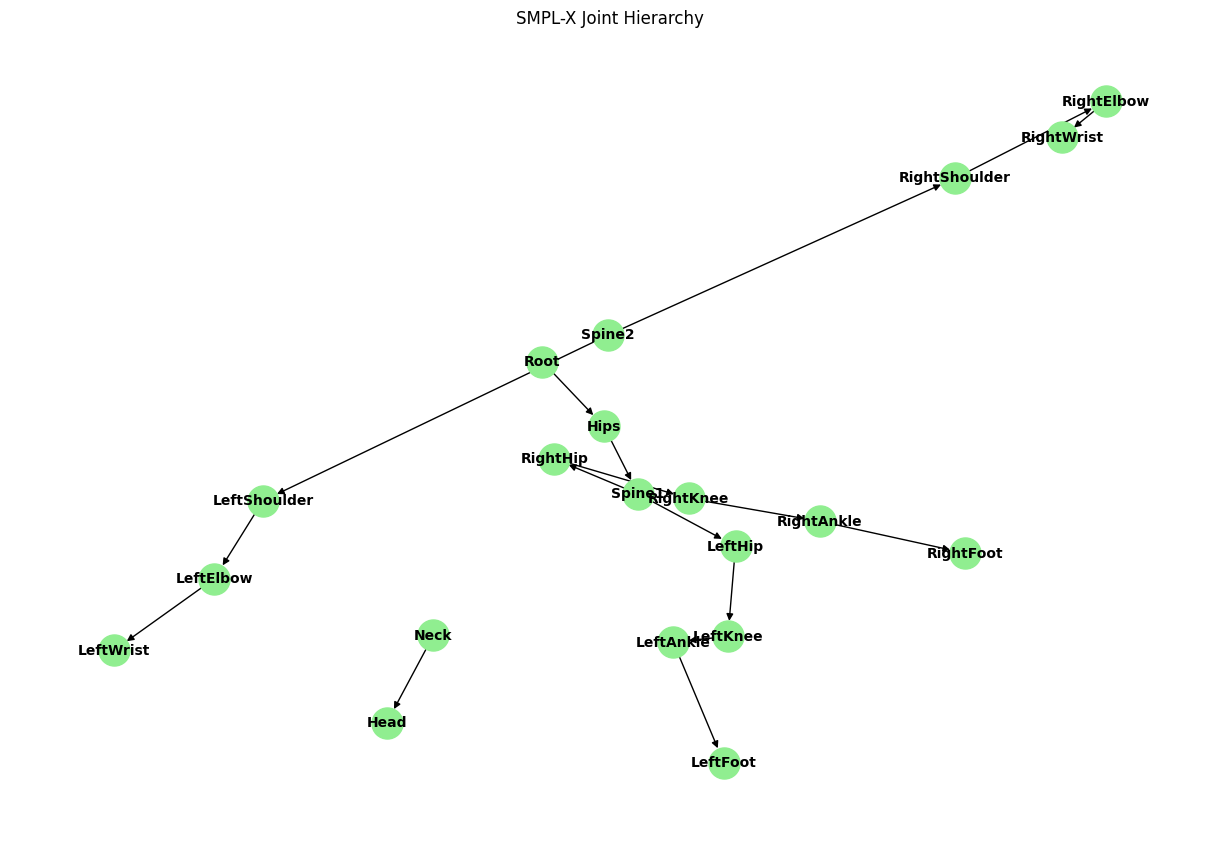

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# 从图片中提取的 kintree_table 数据
kintree_table = [
    [-1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 12, 13, 14, 16, 17, 18, 19, 15, 15, 15, 20, 25, 26, 20, 28, 29, 20, 31, 32, 20, 34, 35, 20, 37, 38, 21, 40, 41, 21, 43, 44, 21, 46, 47, 21, 49, 50, 21, 52, 53],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
]

# 创建一个有向图
G = nx.DiGraph()

# 添加边
for parent, child in zip(*kintree_table):
    if parent != -1:  # 根节点没有父节点
        G.add_edge(parent, child)

# 画图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # 使用 spring layout 布局
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title("Kinematic Tree Structure")
plt.show()


In [ ]:
from pytorch3d import transforms
import smplx
import numpy as np
for i in range(737):
    data = '/home/lyh/pythonproject/xavatar/data/ZJUMoCap/LYH3/models/{i:06d}.npz'
    aa = transforms.matrix_to_axis_angle(pose_output.pred_theta_mats.reshape(-1, 3, 3))
    global_orient = np.array(data['global_orient'])
    betas = np.array(data['betas'])
    body_pose = aa[3:].unsqueeze(0)
    model_n = smplx.create("/home/lyh/pythonproject/xavatar/body_models/smplx/neutral/model.pkl", model_type="smplx", gender="neutral")
    output_n = model_n(betas=pose_output.pred_shape.detach().cpu(), global_orient=global_orient.detach().cpu(), body_pose=body_pose.detach().cpu(), transl=pose_output.transl.detach().cpu())

    joints = output_n.joints[0, :55, :]
    joints = joints.detach().cpu().numpy()

In [13]:
import pickle
import numpy as np
np.set_printoptions(threshold=np.inf)
with open('/home/lyh/pythonproject/xavatar/data/ZJUMoCap/LYH3/lables.pkl', 'rb') as f:
    data = pickle.load(f)

print(data)

{'xyz': TrackedArray([[ 4.30265245e-02,  2.90955081e-01,  6.82384030e-02],
              [ 6.88575929e-01, -9.28336184e-01,  7.29047695e-02],
              [-7.42904175e-02,  2.87436461e-01, -2.52150740e-02],
              [-3.00942371e-02,  3.04937976e-01,  7.18047548e-02],
              [-7.95313612e-01,  2.64026961e-02, -7.69400364e-02],
              [-5.67612934e-02,  1.54695354e-01, -1.62513923e-02],
              [ 1.96902333e-02,  3.03154635e-01,  5.86765722e-02],
              [-8.11263595e-01,  2.14821124e-02, -7.13857939e-02],
              [ 5.30165444e-02,  3.53334540e-01,  4.32627890e-02],
              [ 2.23416804e-02,  2.90543171e-01,  5.73651646e-02],
              [-5.92520467e-01, -9.15677355e-01, -9.66922362e-02],
              [-7.12788543e-01,  1.55760462e-02, -4.33852246e-02],
              [-6.85425044e-02,  2.70011999e-01, -8.50939359e-03],
              [-1.54501238e-01,  9.84195131e-02,  1.48876822e-02],
              [-2.13744345e-01, -4.41912327e-01,  3.16

In [7]:
import numpy as np

np.random.seed(42)

yk = np.random.randn(2)
sk = np.random.randn(2)

Bk = np.random.randn(2, 2)

print("yk:", yk)
print("sk:", sk)
print("Bk:", Bk)

a = (yk * yk.T)/(yk * sk.T) - (Bk * sk * sk.T * Bk)/(sk.T * Bk * sk)
print(a)

yk: [ 0.49671415 -0.1382643 ]
sk: [0.64768854 1.52302986]
Bk: [[-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]]
[[ 1.00105617  0.14335456]
 [-0.81231002 -0.85821713]]


In [1]:
import re
import ast
import torch

def parse_tensor_string(s):
    # 1. 去除 device='cuda:0' 和 dtype=torch.float32 等 PyTorch 参数
    s = re.sub(r",?\s*device='[^']*'", '', s)
    s = re.sub(r",?\s*dtype=torch\.\w+", '', s)

    # 2. 提取所有 tensor(...) 里的内容（考虑换行、嵌套结构）
    tensor_strs = re.findall(r'tensor\((\[.*?\]|\(.*?\))\)', s, re.DOTALL)
    tensor_list = []

    for ts in tensor_strs:
        try:
            # 安全地把字符串转成 Python 列表/元组
            data = ast.literal_eval(ts)
            t = torch.tensor(data)
            tensor_list.append(t)
        except Exception as e:
            print(f"[Parse error] Failed to parse tensor from:\n{ts}\nError: {e}")
    
    return tensor_list


import socket
import time

# 创建 UDP 套接字并绑定到指定端口
serverip= ''#监听所有接口'
serverport=8081
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((serverip, serverport))
#初始化变量
lasttime = time.time()
framecount =0
fps =0

while True:
    data, addr = sock.recvfrom(65525)  # 接收数据
    print("Received data from:", addr)

    # 处理数据
    current_time = time.time()
    framecount += 1
    elapsed_time = current_time - lasttime
    if elapsed_time >= 1.0:
        fps = framecount / elapsed_time
        print(f"FPS: {fps:.2f}")
        lasttime = current_time
        framecount = 0

    try:
        start = time.time()
        tensor_list = parse_tensor_string(data.decode('utf-8'))
        # for i, t in enumerate(tensor_list):
        #     print(f"Tensor {i} shape: {t.shape}, {t}")
        
    except Exception as e:
        print("Failed to handle incoming data:", e)
#加载
#预展示
#测试性能


Received data from: ('192.168.50.91', 39566)
FPS: 0.12
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)
Received data from: ('192.168.50.91', 39566)


KeyboardInterrupt: 